In [3]:
%run _init_.py

C:\Users\m\4차4차\speed\ml\_init_.py:26: SyntaxWarning: invalid escape sequence '\W'
  font_path = "c:\Windows\Fonts\malgun.ttf"


pandas: pd 2.2.2
numpy : np 1.26.4
matplotlib : mpl 3.9.2
seaborn : sns 0.13.2
sklearn : skl 1.5.1


In [4]:
ml = pd.read_csv('top10.csv')

### Linear Regression(선형 회귀)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 프레임 로드 (실제 데이터 파일을 불러올 수 있음)
# df = pd.read_csv('your_data.csv')

# 피처와 타겟 변수 설정
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 그레디언트 부스팅 모델 생성
model = GradientBoostingRegressor(random_state=42)

# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 모델 가져오기
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# 튜닝된 모델로 훈련
best_model.fit(X_train, y_train)

# 예측
y_pred = best_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
from sklearn.model_selection import cross_val_score

# 교차 검증을 사용하여 모델 평가
cv_scores = cross_val_score(best_model, X_scaled, y, cv=2, scoring='neg_mean_squared_error')
print(f"Cross-Validated MSE: {-cv_scores.mean()}")

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


### 랜덤 포레스트

In [6]:
#하이퍼 파리미터 찾기

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 데이터 준비
X = ml.drop(columns=['SalePrice'])
y = ml['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(100, 3000, 100),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] 
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# 성능 평가 (Root Mean Squared Error 계산)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}
Training RMSE: 0.10525751302264497
Test RMSE: 0.15908390590458127
Training R^2 Score: 0.9296994830342695
Test R^2 Score: 0.8487276356897315


c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# 최적 값 적용
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 데이터 준비
X = ml.drop(columns=['SalePrice'])
y = ml['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(1200),
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [4],
    'max_features': ['sqrt'] 
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# 성능 평가 (Root Mean Squared Error 계산)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")


### 그레디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = ml.drop(columns=['SalePrice'])
y = ml['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 그레디언트 부스팅 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_

# 훈련 데이터와 테스트 데이터에 대한 예측
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# 성능 평가
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = df.drop(columns=['SalePrice_log'])
y = df['SalePrice_log']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 그레디언트 부스팅 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(900),
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'subsample': [0.9]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_

# 훈련 데이터와 테스트 데이터에 대한 예측
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# 성능 평가
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")


### XGboosting 모델

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 4, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 성능 평가
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


### LightGBM 회귀 모델

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = ml.drop(columns=['SalePrice'])
y = ml['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'num_leaves': [31, 63, 127, 255],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    lgb.LGBMRegressor(objective='regression', random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


# 성능 평가 (Root Mean Squared Error 계산)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# 특성과 타겟 변수 정의
X = ml.drop('SalePrice', axis=1)
y = ml['SalePrice']


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 성능 평가
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 10
[LightGBM] [Info] Start training from score 12.025786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

C:\Users\m\AppData\Local\Temp\ipykernel_14344\3306106655.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


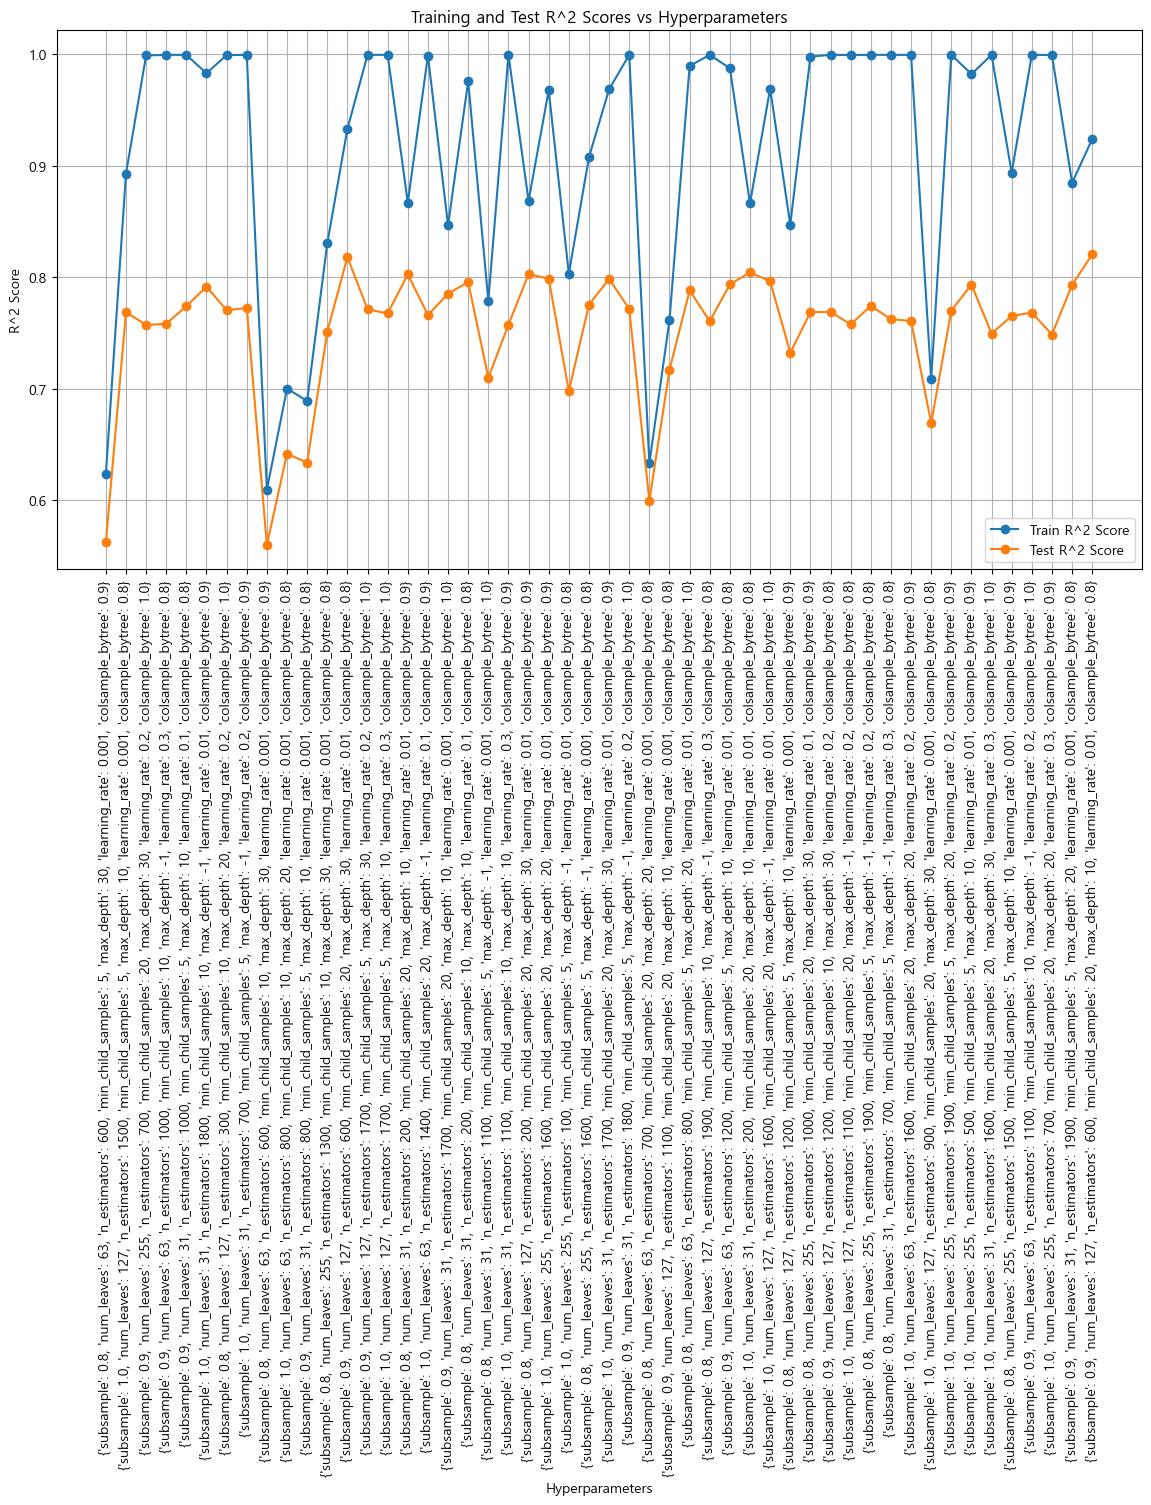

In [9]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
X = ml.drop(columns=['SalePrice'])
y = ml['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'num_leaves': [31, 63, 127, 255],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    lgb.LGBMRegressor(objective='regression', random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 성능 데이터 수집
results = pd.DataFrame(random_search.cv_results_)

# Train and Test R^2 Score 수집
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

# 하이퍼파라미터 조합을 문자열로 변환하여 x축 레이블로 사용
params = results['params'].apply(lambda x: str(x))

# 선 그래프 시각화
plt.figure(figsize=(14, 7))
plt.plot(params, train_scores, label='Train R^2 Score', marker='o')
plt.plot(params, test_scores, label='Test R^2 Score', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Hyperparameters')
plt.ylabel('R^2 Score')
plt.title('Training and Test R^2 Scores vs Hyperparameters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 기본 모델 2개로 앙상블

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 데이터 프레임 로드 (실제 데이터 파일을 불러올 수 있음)
# df = pd.read_csv('your_data.csv')

# 피처와 타겟 변수 설정
X = ml.drop('SalePrice', axis=1)
y = ml['SalePrice']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 개별 모델 생성
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[('gbm', gbm), ('rf', rf)])

# 스태킹 회귀 모델 생성
stacking_regressor = StackingRegressor(
    estimators=[('gbm', gbm), ('rf', rf)],
    final_estimator=LinearRegression()
)

# 모델 훈련
voting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

# 예측
voting_pred = voting_regressor.predict(X_test)
stacking_pred = stacking_regressor.predict(X_test)

# 모델 평가
voting_mse = mean_squared_error(y_test, voting_pred)
stacking_mse = mean_squared_error(y_test, stacking_pred)
voting_mae = mean_absolute_error(y_test, voting_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)
voting_r2 = r2_score(y_test, voting_pred)
stacking_r2 = r2_score(y_test, stacking_pred)


print(f"Voting Regressor - Mean Squared Error: {voting_mse}")
print(f"Voting Regressor - Mean Absolute Error: {voting_mae}")
print(f"Voting Regressor - R^2 Score: {voting_r2}")

print(f"Stacking Regressor - Mean Squared Error: {stacking_mse}")
print(f"Stacking Regressor - Mean Absolute Error: {stacking_mae}")
print(f"Stacking Regressor - R^2 Score: {stacking_r2}")


Voting Regressor - Mean Squared Error: 0.023895112316457006
Voting Regressor - Mean Absolute Error: 0.10422353516214315
Voting Regressor - R^2 Score: 0.857171070865602
Stacking Regressor - Mean Squared Error: 0.023763552349987904
Stacking Regressor - Mean Absolute Error: 0.10456099452359281
Stacking Regressor - R^2 Score: 0.8579574479656082


In [83]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb

# 모델 정의
gbm = GradientBoostingRegressor(
    subsample=0.9,
    n_estimators=np.int64(900),
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='log2',
    max_depth=3,
    learning_rate=0.01
)

xgb_model = xgb.XGBRegressor(
    subsample=0.9,
    n_estimators=np.int64(500),
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.01,
    colsample_bytree=0.8
)

# 앙상블 모델 정의
ensemble_model = VotingRegressor(estimators=[
    ('gbm', gbm),
    ('xgb', xgb_model)
])

X = ml.drop('SalePrice', axis=1)
y = ml['SalePrice']

# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 앙상블 모델 학습
ensemble_model.fit(X_train, y_train)

# 앙상블 모델 예측
y_pred_train_ensemble = ensemble_model.predict(X_train)
y_pred_test_ensemble = ensemble_model.predict(X_test)

# 성능 평가
train_r2_ensemble = r2_score(y_train, y_pred_train_ensemble)
test_r2_ensemble = r2_score(y_test, y_pred_test_ensemble)

print(f"Ensemble Model Train R²: {train_r2_ensemble:.4f}")
print(f"Ensemble Model Test R²: {test_r2_ensemble:.4f}")

# 모델의 각 개별 성능 평가
models = [gbm, xgb_model]
for model in models:
    model.fit(X_train, y_train)
    y_pred_train_model = model.predict(X_train)
    y_pred_test_model = model.predict(X_test)
    train_r2_model = r2_score(y_train, y_pred_train_model)
    test_r2_model = r2_score(y_test, y_pred_test_model)
    print(f"{model.__class__.__name__} Train R²: {train_r2_model:.4f}")
    print(f"{model.__class__.__name__} Test R²: {test_r2_model:.4f}")


Ensemble Model Train R²: 0.8879
Ensemble Model Test R²: 0.8595
GradientBoostingRegressor Train R²: 0.8909
GradientBoostingRegressor Test R²: 0.8607
XGBRegressor Train R²: 0.8826
XGBRegressor Test R²: 0.8568


## 기본 모델

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, ExtraTreesRegressor, 
                              VotingRegressor, StackingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 프레임 로드 (실제 데이터 파일을 불러올 수 있음)
# df = pd.read_csv('your_data.csv')

# 피처와 타겟 변수 설정
X = ml.drop('SalePrice', axis=1)
y = ml['SalePrice']

# 데이터 스케일링

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 개별 모델 생성
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
linear = LinearRegression()

# 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[('gbm', gbm), ('rf', rf), ('ada', ada), ('extra', extra_trees), ('linear', linear)])

# 스태킹 회귀 모델 생성
stacking_regressor = StackingRegressor(
    estimators=[('gbm', gbm), ('rf', rf), ('ada', ada), ('extra', extra_trees)],
    final_estimator=linear
)

# 모델 훈련
voting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

# 예측
voting_pred = voting_regressor.predict(X_test)
stacking_pred = stacking_regressor.predict(X_test)

# 모델 평가
voting_mse = mean_squared_error(y_test, voting_pred)
stacking_mse = mean_squared_error(y_test, stacking_pred)
voting_mae = mean_absolute_error(y_test, voting_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)
voting_r2 = r2_score(y_test, voting_pred)
stacking_r2 = r2_score(y_test, stacking_pred)

print(f"Voting Regressor - Mean Squared Error: {voting_mse}")
print(f"Voting Regressor - Mean Absolute Error: {voting_mae}")
print(f"Voting Regressor - R^2 Score: {voting_r2}")

print(f"Stacking Regressor - Mean Squared Error: {stacking_mse}")
print(f"Stacking Regressor - Mean Absolute Error: {stacking_mae}")
print(f"Stacking Regressor - R^2 Score: {stacking_r2}")


Voting Regressor - Mean Squared Error: 0.024439743212241273
Voting Regressor - Mean Absolute Error: 0.10688297088894894
Voting Regressor - R^2 Score: 0.8539156332435407
Stacking Regressor - Mean Squared Error: 0.023864957797809193
Stacking Regressor - Mean Absolute Error: 0.10434898854917425
Stacking Regressor - R^2 Score: 0.8573513143208321


## 최적 하이퍼 파라미터 적용

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, ExtraTreesRegressor, 
                              VotingRegressor, StackingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# 데이터 프레임 로드 (실제 데이터 파일을 불러올 수 있음)
# df = pd.read_csv('your_data.csv')

# 피처와 타겟 변수 설정
X = ml.drop('SalePrice', axis=1)
y = ml['SalePrice']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 개별 모델 생성
rf = RandomForestRegressor(
    n_estimators=np.int64(2900), 
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    random_state=42
)

gbm = GradientBoostingRegressor(
    subsample=0.9, 
    n_estimators=np.int64(800), 
    min_samples_split=10, 
    min_samples_leaf=2,
    max_depth=3, 
    learning_rate=0.01,
    random_state=42
)

xgb_model = xgb.XGBRegressor(
    subsample=0.8, 
    n_estimators=np.int64(700), 
    min_child_weight=1, 
    max_depth=3,
    learning_rate=0.01, 
    colsample_bytree=0.9,
    random_state=42
)


# 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf), 
    ('gbm', gbm), 
    ('xgb', xgb_model), 

])

# 스태킹 회귀 모델 생성
stacking_regressor = StackingRegressor(
    estimators=[
        ('rf', rf), 
        ('gbm', gbm), 
        ('xgb', xgb_model), 

    ],
    final_estimator=LinearRegression()
)

# 모델 훈련
voting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

# 예측
voting_pred = voting_regressor.predict(X_test)
stacking_pred = stacking_regressor.predict(X_test)

# 모델 평가
voting_mse = mean_squared_error(y_test, voting_pred)
stacking_mse = mean_squared_error(y_test, stacking_pred)
voting_mae = mean_absolute_error(y_test, voting_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)
voting_r2 = r2_score(y_test, voting_pred)
stacking_r2 = r2_score(y_test, stacking_pred)

print(f"Voting Regressor - Mean Squared Error: {voting_mse}")
print(f"Voting Regressor - Mean Absolute Error: {voting_mae}")
print(f"Voting Regressor - R^2 Score: {voting_r2}")

print(f"Stacking Regressor - Mean Squared Error: {stacking_mse}")
print(f"Stacking Regressor - Mean Absolute Error: {stacking_mae}")
print(f"Stacking Regressor - R^2 Score: {stacking_r2}")


Voting Regressor - Mean Squared Error: 0.023489660170744775
Voting Regressor - Mean Absolute Error: 0.10384768026411395
Voting Regressor - R^2 Score: 0.8595945914174362
Stacking Regressor - Mean Squared Error: 0.0242318423850793
Stacking Regressor - Mean Absolute Error: 0.10401987948003899
Stacking Regressor - R^2 Score: 0.8551583247243942


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor, 
                              VotingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np



# 피처와 타겟 변수 설정
X = ml.drop('SalePrice', axis=1)
y = ml['SalePrice']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 개별 모델 생성
rf = RandomForestRegressor(
    n_estimators=np.int64(2900), 
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    random_state=42
)

gbm = GradientBoostingRegressor(
    subsample=0.9, 
    n_estimators=np.int64(800), 
    min_samples_split=10, 
    min_samples_leaf=2,
    max_depth=3, 
    learning_rate=0.01,
    random_state=42
)

xgb_model = xgb.XGBRegressor(
    subsample=0.8, 
    n_estimators=np.int64(700), 
    min_child_weight=1, 
    max_depth=3,
    learning_rate=0.01, 
    colsample_bytree=0.9,
    random_state=42
)

# 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf), 
    ('gbm', gbm), 
    ('xgb', xgb_model)
])

# 모델 훈련
voting_regressor.fit(X_train, y_train)

# 예측
voting_train_pred = voting_regressor.predict(X_train)
voting_test_pred = voting_regressor.predict(X_test)

# 모델 평가
voting_train_mse = mean_squared_error(y_train, voting_train_pred)
voting_test_mse = mean_squared_error(y_test, voting_test_pred)
voting_train_mae = mean_absolute_error(y_train, voting_train_pred)
voting_test_mae = mean_absolute_error(y_test, voting_test_pred)
voting_train_r2 = r2_score(y_train, voting_train_pred)
voting_test_r2 = r2_score(y_test, voting_test_pred)

print(f"Voting Regressor - Training Mean Squared Error: {voting_train_mse}")
print(f"Voting Regressor - Test Mean Squared Error: {voting_test_mse}")
print(f"Voting Regressor - Training Mean Absolute Error: {voting_train_mae}")
print(f"Voting Regressor - Test Mean Absolute Error: {voting_test_mae}")
print(f"Voting Regressor - Training R^2 Score: {voting_train_r2}")
print(f"Voting Regressor - Test R^2 Score: {voting_test_r2}")



Voting Regressor - Training Mean Squared Error: 0.010760327799531172
Voting Regressor - Test Mean Squared Error: 0.023489660170744775
Voting Regressor - Training Mean Absolute Error: 0.0754849103929695
Voting Regressor - Test Mean Absolute Error: 0.10384768026411395
Voting Regressor - Training R^2 Score: 0.9317224684713832
Voting Regressor - Test R^2 Score: 0.8595945914174362
